# Project Overview

In this Data Science project, we investigate the relationship between the Rating of an app on Google Play with its different characteristics such as category, price, number of reviews etc.
The dataset for this project is from:

-Google dataset featuring 10,000 Google Play Store apps.https://www.kaggle.com/datasets/lava18/google-play-store-apps

As a Data Scientist, when given a big data set with thousands of rows and tens of columns, the following are the 5 main steps that we would take to analyze the data set:
As a professional data scientist, when given a big data set (in csv format) with thousands of rows and tens of columns, the following are the 5 main steps that I would take to analyze the data set:
1.	Data Cleaning
2.	Exploratory Data Analysis (EDA) 
3.	Feature Engineering 
4.	Modeling via Machine Learning algorithms



#                        1.	**Data Cleaning**: 

We first check the data set for any missing or invalid data, such as NaN values or outliers, and clean the data set by removing or replacing any such values. I also check for duplicates and remove them if necessary. The cleaned data set would then be used for further analysis.


In [149]:
import pandas as pd

# Load the csv file into a pandas dataframe
filepath = './DataSet/googleplaystore.csv' # relative path to csv file
df = pd.read_csv(filepath)

# Check pre-cleaning info
print("\npre-cleaning info:")
print( df.info())

# Check for missing values
print('\nMissing Values:\n', df.isna().sum())

# Check for duplicates
print('\nDuplicates:', df.duplicated().sum())

# Remove duplicated rows
df.drop_duplicates(inplace=True)

# Remove rows with missing values
df.dropna(inplace=True)

# Check the shape of the cleaned dataframe
print('\nCleaned dataframe shape:', df.shape)

# Preview the cleaned dataframe
#print('\nCleaned dataframe preview:\n', df.head())

# Check post-cleaning info
print("\npost-cleaning info:")
print(df.info())
print("\nFormat of Last Updated column:")
print(df["Last Updated"].head())


pre-cleaning info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None

Missing Values:
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Insta

In [150]:
# Convert 'Reviews' column to float
df['Reviews'] = df['Reviews'].astype(float)

# Remove '$' sign from 'Price' column and convert to float
df['Price'] = df['Price'].str.replace('$', '').astype(float)

C:\Users\ROG\AppData\Local\Temp\ipykernel_32640\3862835829.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').astype(float)


In [30]:
# Convert the 'Last Updated' column to datetime format using the specified format string
# and coerce errors
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format='%B %d, %Y', errors='coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8886 non-null   object        
 1   Category        8886 non-null   object        
 2   Rating          8886 non-null   float64       
 3   Reviews         8886 non-null   float64       
 4   Size            8886 non-null   object        
 5   Installs        8886 non-null   object        
 6   Type            8886 non-null   object        
 7   Price           8886 non-null   float64       
 8   Content Rating  8886 non-null   object        
 9   Genres          8886 non-null   object        
 10  Last Updated    8886 non-null   datetime64[ns]
 11  Current Ver     8886 non-null   object        
 12  Android Ver     8886 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 971.9+ KB
None


# 2.	Exploratory Data Analysis (EDA):

After cleaning the data set, we would perform EDA to gain insights into the data set, using summary statistics, visualizations, and other techniques. This step would help us understand the distribution, variability, and patterns in the data, and identify any relationships between variables.

## 2.1 Statistics
We start by looking at the summary statistics for the numerical columns (Rating, Reviews, and Price) using the describe() method. This will give us an idea of the distribution and variability of these variables.

In [31]:
print(df.describe())

            Rating       Reviews        Price
count  8886.000000  8.886000e+03  8886.000000
mean      4.187959  4.730928e+05     0.963526
std       0.522428  2.906007e+06    16.194792
min       1.000000  1.000000e+00     0.000000
25%       4.000000  1.640000e+02     0.000000
50%       4.300000  4.723000e+03     0.000000
75%       4.500000  7.131325e+04     0.000000
max       5.000000  7.815831e+07   400.000000


## 2.2 Visualization (numerical varibles)
Next, we can create visualizations such as histograms, boxplots, or scatterplots to explore the relationships between variables. For example, you could create a scatterplot of Reviews versus Rating to see if there is a correlation between these variables.

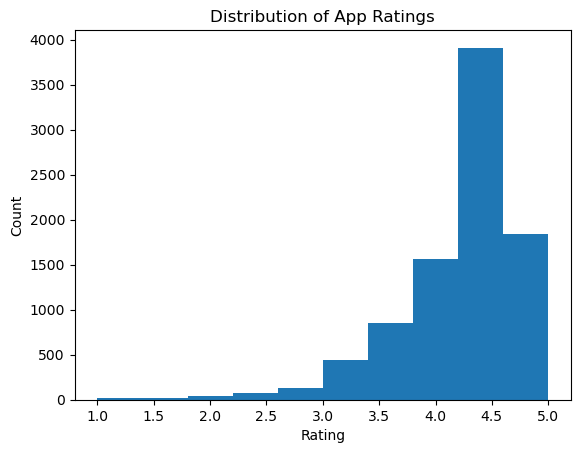

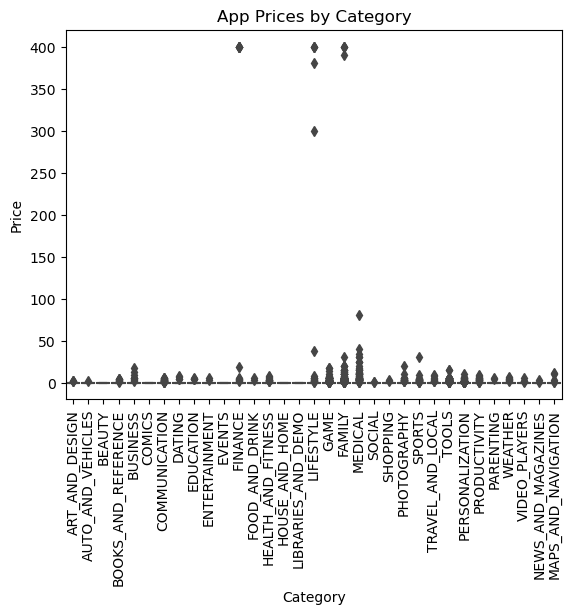

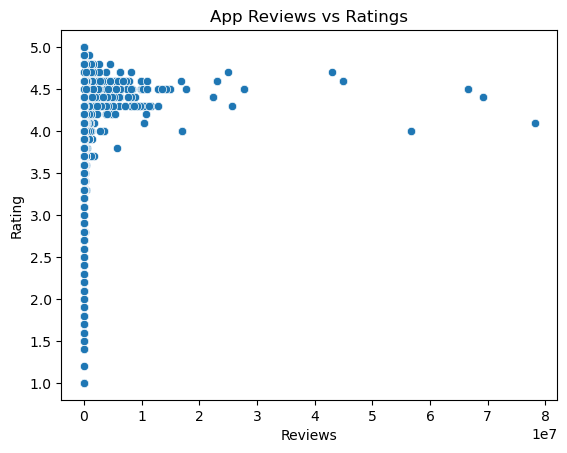

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of app ratings
plt.hist(df['Rating'])
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Boxplot of app prices by category
sns.boxplot(x='Category', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('App Prices by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

# Scatterplot of app reviews and ratings
sns.scatterplot(x='Reviews', y='Rating', data=df)
plt.title('App Reviews vs Ratings')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.show()

## 2.3 Visualization (categorical variables)

We can also explore categorical variables such as Category and Content Rating by creating bar plots to see the frequency of each category.

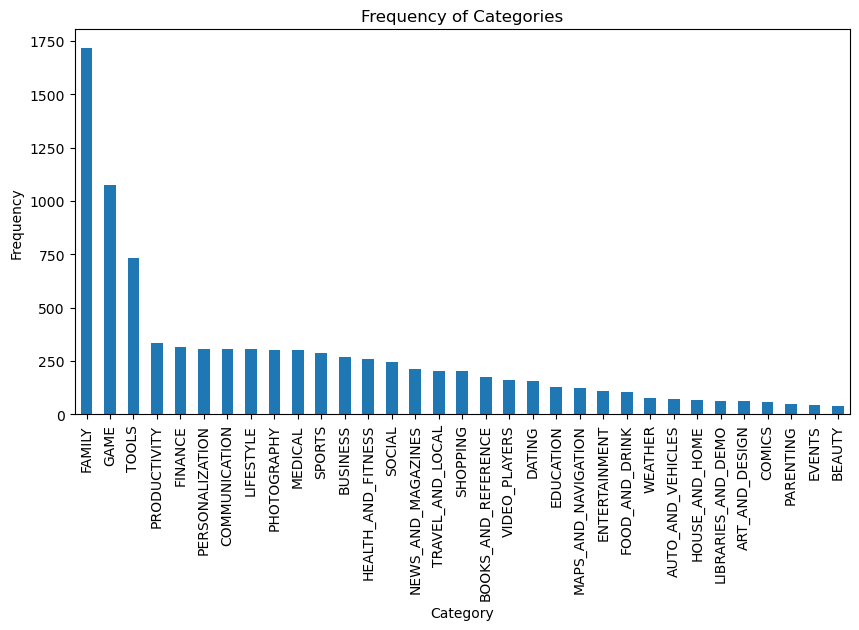

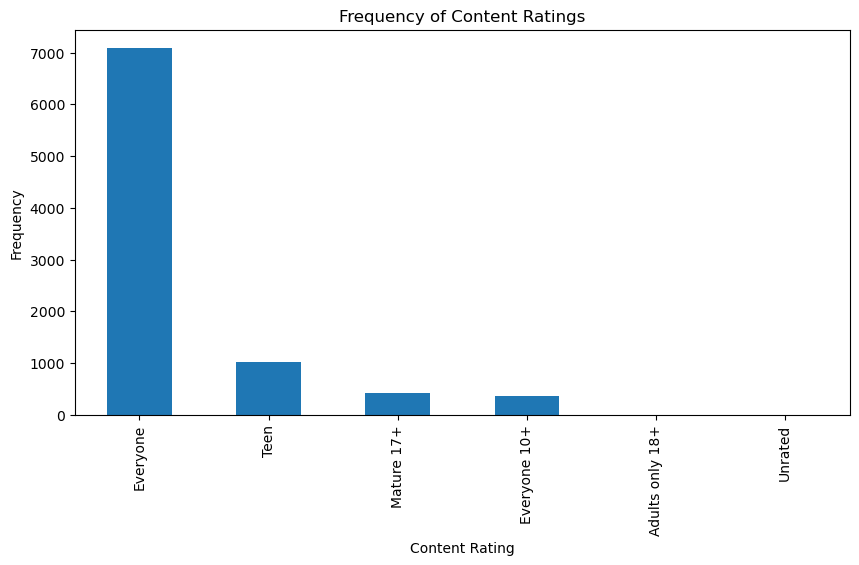

In [33]:
import matplotlib.pyplot as plt

# Bar plot for Category column
plt.figure(figsize=(10,5))
df['Category'].value_counts().plot(kind='bar')
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

# Bar plot for Content Rating column
plt.figure(figsize=(10,5))
df['Content Rating'].value_counts().plot(kind='bar')
plt.title('Frequency of Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Frequency')
plt.show()

## 2.4 Visualization (correlational)
Investigating the correlation between features is part of the EDA (Exploratory Data Analysis) step. EDA aims to explore and understand the data set and its characteristics, including the relationships between variables. Correlation analysis is one of the techniques used in EDA to identify and quantify the strength of the relationship between two or more variables.

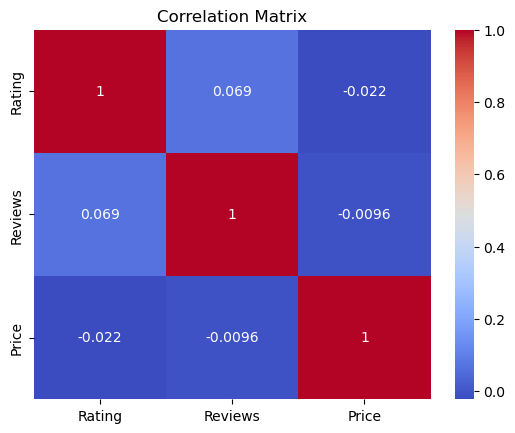

In [34]:
# Create a correlation matrix
corr_matrix = df[['Rating', 'Reviews', 'Price']].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

__Discussions__:The resulting heatmap shows the correlation coefficients between Rating, Reviews, and Price. Positive correlations (correlation coefficient > 0) indicate that the variables increase or decrease together, while negative correlations (correlation coefficient < 0) indicate that the variables move in opposite directions. A correlation coefficient of 0 indicates no correlation.
The results show that there is a waek positive correlation between Rating-Review, and there is a negligible negative correlation between Rating-Price.

How about Rating-Category correlation?!!
First, we can use the __unique()__ function in pandas to get a list of all unique values in a column. 

In [47]:
unique_categories = df['Category'].unique()
print(unique_categories); len(unique_categories)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


33

To check the correlation between Category and Rating, we can group the data by Category and calculate the mean Rating for each Category. Then we can sort the data by the mean Rating in descending order to see which Category has the highest average Rating.

In [151]:
cat_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(cat_rating)

Category
EVENTS                 4.435556
ART_AND_DESIGN         4.377049
EDUCATION              4.375969
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333117
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
SHOPPING               4.251485
WEATHER                4.244000
SPORTS                 4.225175
PRODUCTIVITY           4.201796
FAMILY                 4.191264
AUTO_AND_VEHICLES      4.190411
PHOTOGRAPHY            4.182895
MEDICAL                4.182450
LIBRARIES_AND_DEMO     4.179688
HOUSE_AND_HOME         4.164706
FOOD_AND_DRINK         4.164151
COMICS                 4.155172
COMMUNICATION          4.151466
ENTERTAINMENT          4.136036
NEWS_AND_MAGAZINES     4.128505
FINANCE                4.127445
BUSINESS               4.102593
LIFESTYLE              4.096066
TRAVEL_AND_LOCAL       4.094146
VIDEO_PLAYERS          4.063750
MAPS_AND_NAVIGATION    4.051613

Here, we cannot readily figure out if there is a correlation between Category and Rating. Furthermore, we cannot apply the "Correlation Analysis" of EDA since:
Correlation analysis is a statistical method used to quantify the strength of the relationship between two numerical variables. In the case of Category and Rating, Category is a categorical variable and Rating is a numerical variable. Therefore, correlation analysis may not be appropriate in this case as it is designed to analyze the relationship between _two numerical variables_. 
Instead, we can use other statistical methods such as __ANOVA__ or __chi-squared test__ to determine if there is a significant relationship between Category and Rating. Alternatively, we can use visualization techniques such as boxplots or barplots to explore the relationship between the two variables.

## 2.5 ANOVA test

The function **f_oneway** takes as input one or more arrays of data, which in this case are generated using a list comprehension that loops through each unique category in the Category column of the df dataset. For each category, it creates a new array of ratings corresponding to that category using the loc method to filter the rows of the dataframe where the Category column matches the current category. The asterisk * operator is used to unpack the list of arrays generated by the list comprehension into separate arguments for the f_oneway function.

The output of f_oneway includes the __F-statistic__, which measures the ratio of variation between groups to the variation within groups, as well as the associated __p-value__, which indicates the probability of observing an F-statistic as extreme as the one calculated under the null hypothesis that there is no significant difference between the means of the groups.

In [42]:
from scipy.stats import f_oneway

# Perform the ANOVA test
f_stat, p_value = f_oneway(*[df.loc[df['Category']==cat, 'Rating'] for cat in df['Category'].unique()])

# Print the results
print('F-statistic:', f_stat)
print('p-value:', p_value)
print('Effect size:', grouped_data.max() - grouped_data.min())

F-statistic: 8.313325598257958
p-value: 4.969621644089731e-38
Effect size: 0.46385744234800796


The __F-statistic__ is a measure of the _ratio of the variability between the groups to the variability within the groups_. A large F-statistic indicates that there is a significant difference between the means of the groups. In this case, the F-statistic is 8.313, which is greater than 1, indicating that there is a _significant difference between the means of the groups_ (i.e., different categories).

The __p-value__ is a measure of the _probability of obtaining the observed results if there were no real difference between the groups_. A low p-value (less than 0.05) indicates that there is strong evidence against the null hypothesis (i.e., there is a significant difference between the groups). In this case, the p-value is very small (4.9696e-38), indicating that there is a _significant difference_ between the means of the groups (i.e., different categories).

The __effect size__ is a measure of the _strength of the relationship between the independent and dependent variables_. In this case, the effect size is 0.4639, which indicates a medium to large effect size. This means that there is a _moderate to strong relationship_ between the Category and Rating variables.

#      3. Feature Engineering

Based on the insights gained from EDA, we can create new features from existing ones, transform existing features, and select the most relevant features for modeling. Feature engineering is a crucial step in preparing the data for modeling and improving the performance of machine learning algorithms.

Here, when we have 33 categories in ourr Category column, __one-hot encoding__ is a a viable option. One-hot encoding will create 33 new binary features, one for each category, and assign a value of 1 to the feature corresponding to the category of the observation and 0 to all other features.

Another option is to use __label encoding__, which assigns a unique integer to each category. However, label encoding may not be the best option in this case since it can lead to an arbitrary ordering of the categories that may not be meaningful.

## 3.1 One-Hot encoding

In [50]:
import pandas as pd

# One-hot encode the "Category" column
category_one_hot = pd.get_dummies(df['Category'], prefix='category')

# Concatenate the original dataframe and the one-hot encoded dataframe
df_one_hot = pd.concat([df, category_one_hot], axis=1)

# Drop the original "Category" column
df_one_hot.drop('Category', axis=1, inplace=True)

# Print info
print(df_one_hot.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   App                           8886 non-null   object        
 1   Rating                        8886 non-null   float64       
 2   Reviews                       8886 non-null   float64       
 3   Size                          8886 non-null   object        
 4   Installs                      8886 non-null   object        
 5   Type                          8886 non-null   object        
 6   Price                         8886 non-null   float64       
 7   Content Rating                8886 non-null   object        
 8   Genres                        8886 non-null   object        
 9   Last Updated                  8886 non-null   datetime64[ns]
 10  Current Ver                   8886 non-null   object        
 11  Android Ver                  

## 3.2 Label encoding

In [130]:
from sklearn.preprocessing import LabelEncoder

# Load the data
df_le = df.copy()

# Convert the Category column using label encoding
le = LabelEncoder()
df_le['Category'] = le.fit_transform(df['Category']) + 1 #label encoding starts from 1 not 0

# info and unique values of encoded column
print(df_le["Category"].unique()); print(df_le.info())

[ 1  2  3  4  5  6  7  8  9 10 11 13 14 16 17 18 19 15 12 21 28 27 25 29
 31 30 24 26 23 33 32 22 20]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8886 non-null   object        
 1   Category        8886 non-null   int32         
 2   Rating          8886 non-null   float64       
 3   Reviews         8886 non-null   float64       
 4   Size            8886 non-null   object        
 5   Installs        8886 non-null   object        
 6   Type            8886 non-null   object        
 7   Price           8886 non-null   float64       
 8   Content Rating  8886 non-null   object        
 9   Genres          8886 non-null   object        
 10  Last Updated    8886 non-null   datetime64[ns]
 11  Current Ver     8886 non-null   object        
 12  Android Ver     8886 non-null   object        
dtypes: da

# 4. Machine Learning

A commonly used machine learning algorithm for regression problems like predicting Rating is the Random Forest Regressor. Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to obtain a more accurate and stable model. Other popular regression algorithms include Linear Regression, Support Vector Regression, and Gradient Boosting Regression. It's always a good idea to try different models and compare their performance using appropriate evaluation metrics to choose the best one for your problem.

Multi-layer perceptron regressor (MLPRegressor) can also be useful for this task. It is a type of artificial neural network that can learn complex non-linear relationships between inputs and outputs. MLPRegressor can handle both categorical and numerical inputs, making it suitable for our dataset with the encoded categorical variable and numerical variables. However, it may require more tuning and training time compared to simpler models like Linear Regression or Decision Tree Regression.

## 4.1 Random Forest Regressor with One-Hot encoding

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# creat a "list" of category_columns 
category_cols = df_one_hot.columns[12:].tolist()

# Select the relevant columns
X = df_one_hot[['Reviews', 'Price'] + category_cols] 
y = df_one_hot['Rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2, max_features="auto", random_state=42)

# Train the model using the training set
rf.fit(X_train, y_train)

# Use the trained model to predict the Rating for the test set
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.26087798539185164
R-squared Score: 0.05249179160547146


### 4.1.2 Model Evaluation (RFRegressor + OHE)

In [89]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Evaluate the model on the training set
y_pred_train = rf.predict(X_train)  # Use the trained Random Forest Regressor model to make predictions on the training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  # Calculate the RMSE of the training set predictions
mae_train = mean_absolute_error(y_train, y_pred_train)  # Calculate the MAE of the training set predictions
r2_train = r2_score(y_train, y_pred_train)  # Calculate the R2 score of the training set predictions
score_train = rf.score(X_train, y_train)  # Calculate the accuracy score of the training set predictions

# Evaluate the model on the testing set
y_pred_test = rf.predict(X_test)  # Use the trained Random Forest Regressor model to make predictions on the testing set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))  # Calculate the RMSE of the testing set predictions
mae_test = mean_absolute_error(y_test, y_pred_test)  # Calculate the MAE of the testing set predictions
r2_test = r2_score(y_test, y_pred_test)  # Calculate the R2 score of the testing set predictions
score_test = rf.score(X_test, y_test)  # Calculate the accuracy score of the testing set predictions



# Create a DataFrame to store the results
results = pd.DataFrame({
    "Training set": [rmse_train, r2_train, mae_train, score_train],
    "Testing set": [rmse_test, r2_test, mae_test, score_test]
}, index=["RMSE", "R2", "MAE", "Accuracy score"])

# Print the results
print("---Random Forest Regressor Model Performance Evaluation---\n")
print(results)

# Get the value of the RFRegression parameter
n_estimators_param = rf.get_params()['n_estimators']
max_depth_param = rf.get_params()['max_depth']
min_samples_split_param = rf.get_params()['min_samples_split']
max_features_param = rf.get_params()['max_features']

print ("\n---RFPRegression model Parameters---\n")
print(f"no. Trees: {n_estimators_param}")
print(f"Max Depth: {max_depth_param}")
print(f"Min Sample Split: {min_samples_split_param}")
print(f"Max Features: {max_features_param}")

---Random Forest Regressor Model Performance Evaluation---

                Training set  Testing set
RMSE                0.452353     0.510762
R2                  0.248514     0.052492
MAE                 0.314973     0.349824
Accuracy score      0.248514     0.052492

---RFPRegression model Parameters---

no. Trees: 1000
Max Depth: 10
Min Sample Split: 2
Max Features: auto


# 4.2 Multi-layer Perceptron Regressor with One-Hot encoding

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# creat a "list" of category_columns 
category_cols = df_one_hot.columns[12:].tolist()

# Select the relevant columns
X = df_one_hot[['Reviews', 'Price'] + category_cols] 
y = df_one_hot['Rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a MLPRegressor model
mlp = MLPRegressor(hidden_layer_sizes=(200, 100), activation="logistic", solver='adam', alpha=0.0001,
                   learning_rate='constant', max_iter=10000, random_state=42)

# Train the model using the training set
mlp.fit(X_train, y_train)

# Use the trained model to predict the Rating for the test set
y_pred = mlp.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 0.27549525475854963
R-squared Score: -0.0005980951799424705


### 4.2.2 Model Evaluation (MLRegressor + OHE)

In [153]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Evaluate the model on the training set
y_pred_train = mlp.predict(X_train)  # Use the trained Random Forest Regressor model to make predictions on the training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  # Calculate the RMSE of the training set predictions
mae_train = mean_absolute_error(y_train, y_pred_train)  # Calculate the MAE of the training set predictions
r2_train = r2_score(y_train, y_pred_train)  # Calculate the R2 score of the training set predictions
score_train = mlp.score(X_train, y_train)  # Calculate the accuracy score of the training set predictions

# Evaluate the model on the testing set
y_pred_test = mlp.predict(X_test)  # Use the trained Random Forest Regressor model to make predictions on the testing set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))  # Calculate the RMSE of the testing set predictions
mae_test = mean_absolute_error(y_test, y_pred_test)  # Calculate the MAE of the testing set predictions
r2_test = r2_score(y_test, y_pred_test)  # Calculate the R2 score of the testing set predictions
score_test = mlp.score(X_test, y_test)  # Calculate the accuracy score of the testing set predictions



# Create a DataFrame to store the results
results = pd.DataFrame({
    "Training set": [rmse_train, r2_train, mae_train, score_train],
    "Testing set": [rmse_test, r2_test, mae_test, score_test]
}, index=["RMSE", "R2", "MAE", "Accuracy score"])

# Print the results
print("---Random Forest Regressor Model Performance Evaluation---\n")
print(results)

# Get the value of the MLPRegression parameter
activation_param = mlp.get_params()['activation']
hid_lay_size_param = mlp.get_params()['hidden_layer_sizes']
solver_param = mlp.get_params()['solver']
alpha_param = mlp.get_params()['alpha']
max_iter = mlp.get_params()['max_iter']
print ("\n---MLPRegression model Parameters---\n")
print(f"Hidden Layers: {hid_lay_size_param}")
print(f"Activation function: {activation_param}")
print(f"Solver: {solver_param}")
print(f"Alpha: {alpha_param}")
print(f"Max iteration: {max_iter}")

---Random Forest Regressor Model Performance Evaluation---

                Training set  Testing set
RMSE                0.508946     0.524876
R2                  0.048716    -0.000598
MAE                 0.366611     0.373792
Accuracy score      0.048716    -0.000598

---MLPRegression model Parameters---

Hidden Layers: (200, 100)
Activation function: logistic
Solver: adam
Alpha: 0.0001
Max iteration: 10000


## 4.3 Random Forest Regressor with Label encoding

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Select the relevant columns
X = df_le[[ 'Reviews', 'Price','Category']] 
y = df_le['Rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2, max_features="auto", random_state=42)

# Train the model using the training set
rf.fit(X_train, y_train)

# Use the trained model to predict the Rating for the test set
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.2630673423874552
R-squared Score: 0.044540052322739276


## 4.4 Multi-layer Perceptron Regressor with Label encoding

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select the relevant columns
X = df_le[[ 'Reviews', 'Price','Category']] 
y = df_le['Rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a MLPRegressor model
mlp = MLPRegressor(hidden_layer_sizes=(200, 100), activation="logistic", solver='adam', alpha=0.0001,
                   learning_rate='constant', max_iter=10000, random_state=42)

# Train the model using the training set
mlp.fit(X_train, y_train)

# Use the trained model to predict the Rating for the test set
y_pred = mlp.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 0.27543294296085136
R-squared Score: -0.00037177888226680444


## 4.5 Linear Regression
For a linear regression model, it is recommended to use __label encoding__ for categorical variables rather than one-hot encoding since linear regression models are sensitive to the number of variables and the high dimensionality of one-hot encoding can lead to __overfitting__ and decreased model interpretability.

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the relevant columns
X = df_le[[ 'Reviews', 'Price','Category']] 
y = df_le['Rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
reg = LinearRegression()

# Train the model using the training set
reg.fit(X_train, y_train)

# Use the trained model to predict the Rating for the test set
y_pred = reg.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.2732759909893784
R-squared Score: 0.0074622654316433


# Conclusions

No substantial relationship was observed between the Rating of an app and its Category, Price, and number of Review. Three ML algorithms (i.e., RFRegresso, MLPRegressor, and Linear Regression) along with two different conversion techniques for categorical into numerical variables (i.e., hot-one encoding and label encoding) were applied. 
Overall, Random Forest Regressor with one-hot encoding resulted in a better comparative accuracy (aka R2), yet, no meaningful correlation between the mentioned variables was detected.
